<a href="https://colab.research.google.com/github/KenMuriuki/Deriving-Insights-on-Web-data/blob/master/Kennedy_Muriuki_Independent_Project_Week_12_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Moringa School Independent Project Week 12**


## Bussiness Understanding

### a) Specifying the Question

> A Kenyan client wishes to advertise their online course on an online platform. They wish to identify their audiences better so as to generate more leads and consequently improve the performance of their business. As a data scientist, I am tasked with analysing and identifying individuals that are most likely to click on her advertisement.

### b) Defining the Metric for Success

> The metric for this analysis is to identify distinguishing features that can identify/isolate her target audience from the rest of the population online.

### d) Recording the Experimental Design

> This study will follow the following life cycle:

*   Defining the question
*   Reading the data
*   Checking for missing data and outliers
*   Perform Univariate analysis
*   Perform Bivariate analysis
*   Conclusions
*   Recommendations






## **Loading the dataset**

In [1]:
# loading the dataset which is in csv format

df <- read.csv("advertising.csv",header = T)

In [2]:
# Viewing the first five rows of the dataset

head(df,5)

,Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Ad.Topic.Line,City,Male,Country,Timestamp,Clicked.on.Ad
,<dbl>,<int>,<dbl>,<dbl>,<fct>,<fct>,<int>,<fct>,<fct>,<int>
1,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
2,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
3,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
4,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
5,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [ ]:
# viewing the last five entries of the dataset

tail(df,5)

,Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Ad.Topic.Line,City,Male,Country,Timestamp,Clicked.on.Ad
,<dbl>,<int>,<dbl>,<dbl>,<fct>,<fct>,<int>,<fct>,<fct>,<int>
996,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
997,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
998,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
999,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0
1000,45.01,26,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,0,Brazil,2016-06-03 21:43:21,1


In [ ]:
# checking the dimension of the dataset

dim(df)

[1] 1000   10

In [ ]:
# displaying the column names in the dataset

names(df)

[1] "Daily.Time.Spent.on.Site" "Age"                     
 [3] "Area.Income"              "Daily.Internet.Usage"    
 [5] "Ad.Topic.Line"            "City"                    
 [7] "Male"                     "Country"                 
 [9] "Timestamp"                "Clicked.on.Ad"

In [ ]:
# generating a sumary of the dataset

summary(df)

 Daily.Time.Spent.on.Site      Age         Area.Income    Daily.Internet.Usage
 Min.   :32.60            Min.   :19.00   Min.   :13996   Min.   :104.8       
 1st Qu.:51.36            1st Qu.:29.00   1st Qu.:47032   1st Qu.:138.8       
 Median :68.22            Median :35.00   Median :57012   Median :183.1       
 Mean   :65.00            Mean   :36.01   Mean   :55000   Mean   :180.0       
 3rd Qu.:78.55            3rd Qu.:42.00   3rd Qu.:65471   3rd Qu.:218.8       
 Max.   :91.43            Max.   :61.00   Max.   :79485   Max.   :270.0       
                                                                              
                                 Ad.Topic.Line              City    
 Adaptive 24hour Graphic Interface      :  1   Lisamouth      :  3  
 Adaptive asynchronous attitude         :  1   Williamsport   :  3  
 Adaptive context-sensitive application :  1   Benjaminchester:  2  
 Adaptive contextually-based methodology:  1   East John      :  2  
 Adaptive demand-driven

In [ ]:
# checking to see the structure of the dataset

str(df)

'data.frame':	1000 obs. of  10 variables:
 $ Daily.Time.Spent.on.Site: num  69 80.2 69.5 74.2 68.4 ...
 $ Age                     : int  35 31 26 29 35 23 33 48 30 20 ...
 $ Area.Income             : num  61834 68442 59786 54806 73890 ...
 $ Daily.Internet.Usage    : num  256 194 236 246 226 ...
 $ Ad.Topic.Line           : Factor w/ 1000 levels "Adaptive 24hour Graphic Interface",..: 92 465 567 904 767 806 223 724 108 455 ...
 $ City                    : Factor w/ 969 levels "Adamsbury","Adamside",..: 962 904 112 940 806 283 47 672 885 713 ...
 $ Male                    : int  0 1 0 1 0 1 0 1 1 1 ...
 $ Country                 : Factor w/ 237 levels "Afghanistan",..: 216 148 185 104 97 159 146 13 83 79 ...
 $ Timestamp               : Factor w/ 1000 levels "2016-01-01 02:52:10",..: 440 475 368 57 768 690 131 334 549 942 ...
 $ Clicked.on.Ad           : int  0 0 0 0 0 0 0 1 0 0 ...


The dataset contains 1000 entries and 10 columns. The dataset contains six numerical columns and 4 categorical columns. The categorical columns have been loaded as factors.

## **Checking for missing values**

In [ ]:
# checking to see if the dataset contains any missing values

any(is.na(df))

[1] FALSE

## **Checking for duplicates**

In [ ]:
# verifying if the dataset contains any duplicated data

any(duplicated(df))

[1] FALSE

The dataset doesn't have missing values or duplicates therefore this dataset is of good quality.

## **Handling outliers**

In [3]:
# to check for outliers we draw a box and whisker plot for the numerical columns. I first select the numerical columns 

num_col <- df[,c(1,2,3,4,10)]

head(num_col)

,Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Clicked.on.Ad
,<dbl>,<int>,<dbl>,<dbl>,<int>
1,68.95,35,61833.90,256.09,0
2,80.23,31,68441.85,193.77,0
3,69.47,26,59785.94,236.50,0
4,74.15,29,54806.18,245.89,0
5,68.37,35,73889.99,225.58,0
6,59.99,23,59761.56,226.74,0


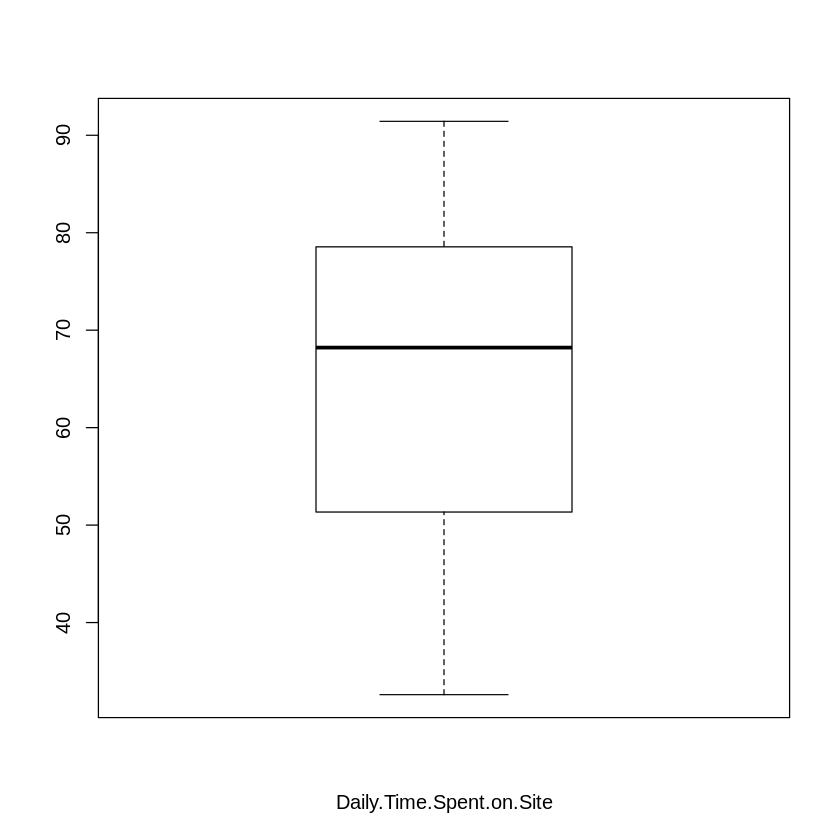

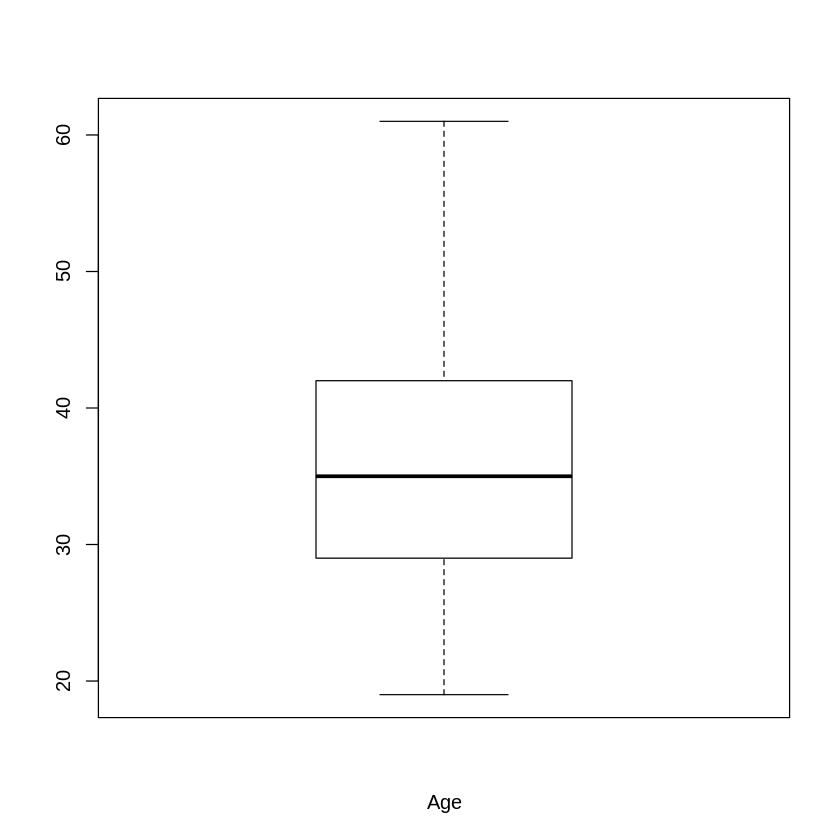

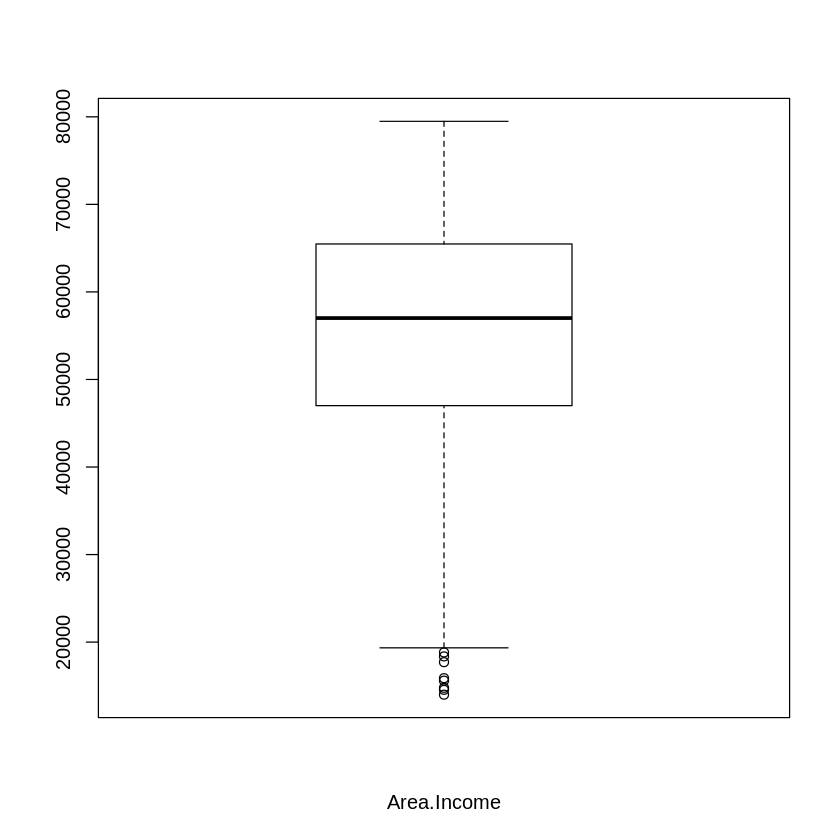

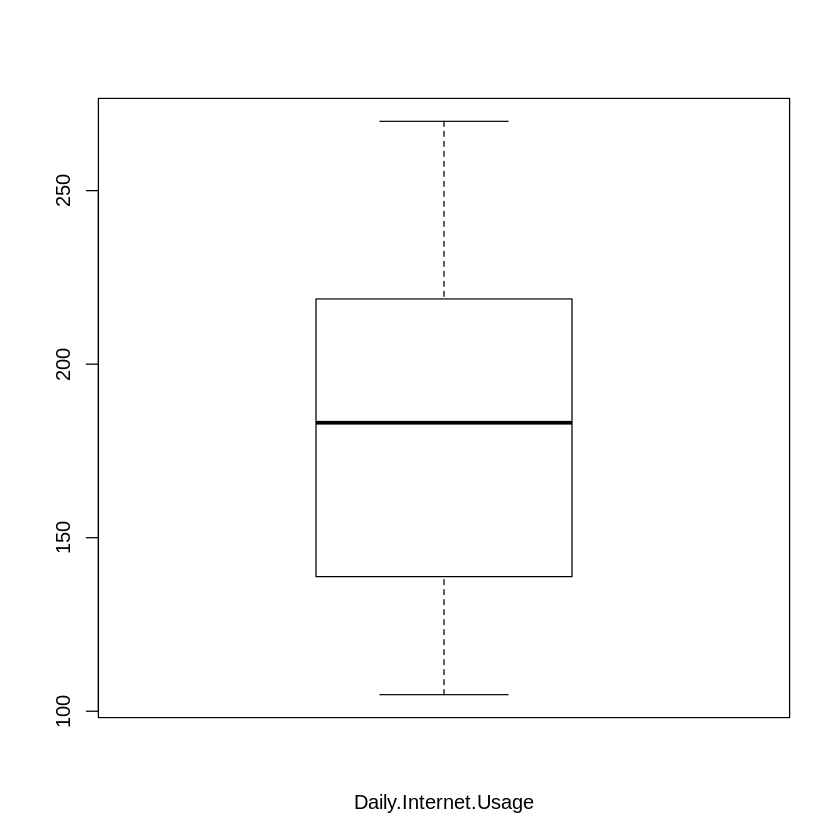

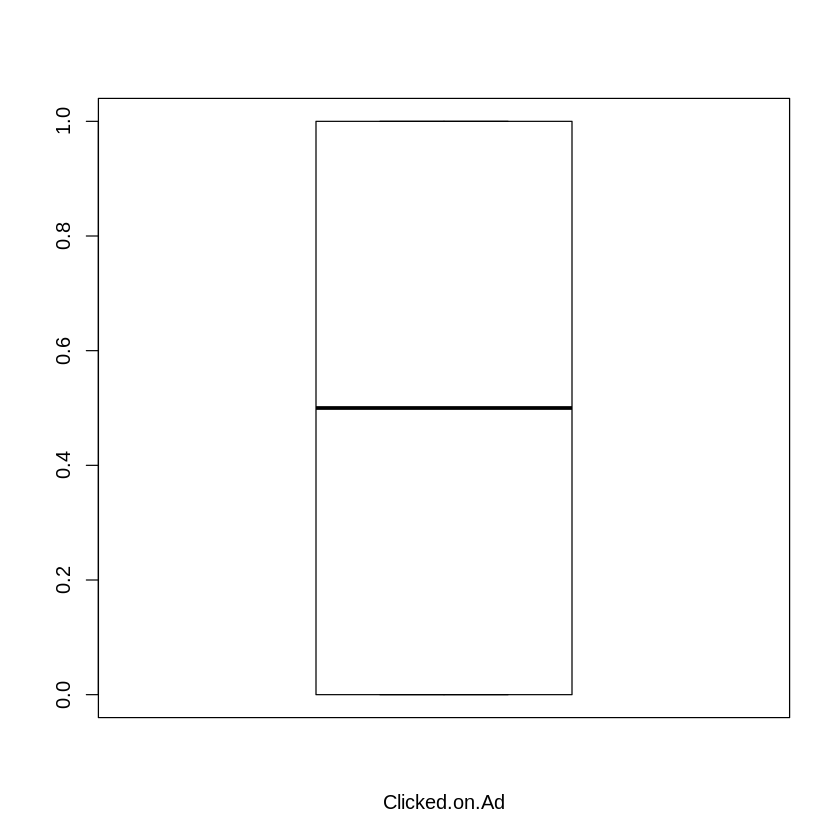

In [ ]:
# looping through the columns to generate boxplots

for (i in names(num_col)){
  x <- num_col[,i]
  boxplot(x, xlab= i)
  boxplot.stats(x)$out
}

In [ ]:
# listing the outliers in the Area.Income column

boxplot.stats(df$Area.Income)$out

[1] 17709.98 18819.34 15598.29 15879.10 14548.06 13996.50 14775.50 18368.57

The box and whisker plots generated shows the columns as having no outliers except the column Are.Income. The minimum entry for the column was 20,000. There were 8 outliers that ranged from 17,709 to 18,368. The outliers are expected in the Income column and therefore will not be removed as they contain useful information.

## **Univariate Exploratory Data Analysis**

In [12]:
# calculating the mean of the numerical columns

for (i in names(num_col)){
  x <- num_col[,i]
  mean <- mean(x)
  print(paste("The mean ", i , "is" ,  mean))
}

[1] "The mean  Daily.Time.Spent.on.Site is 65.0002"
[1] "The mean  Age is 36.009"
[1] "The mean  Area.Income is 55000.00008"
[1] "The mean  Daily.Internet.Usage is 180.0001"
[1] "The mean  Clicked.on.Ad is 0.5"


In [ ]:
# calculating the median for the numerical columns

for (i in names(num_col)){
  x <- num_col[,i]
  median <- median(x)
  print(paste("The median of the column", i , "is" ,  median))
}

[1] "The median of the column Daily.Time.Spent.on.Site is 68.215"
[1] "The median of the column Age is 35"
[1] "The median of the column Area.Income is 57012.3"
[1] "The median of the column Daily.Internet.Usage is 183.13"
[1] "The median of the column Clicked.on.Ad is 0.5"


In [11]:
# calculating the mode of the numerical columns

# writing the function to calculate the mode of the numerical columns

getmode <- function(a){
  uniqv <- unique(a)
  uniqv[which.max(tabulate(match(a,uniqv)))]
}

# looping through the columns to get the mode

for (i in names(num_col)){
  x <- num_col[,i]
  mode <- getmode(x)
  print(paste("The mode of the column", i , "is" ,  mode))
}

[1] "The mode of the column Daily.Time.Spent.on.Site is 62.26"
[1] "The mode of the column Age is 31"
[1] "The mode of the column Area.Income is 61833.9"
[1] "The mode of the column Daily.Internet.Usage is 167.22"
[1] "The mode of the column Clicked.on.Ad is 0"


In [ ]:
# displaying the minimum and maximum of the numeric columns

for (i in names(num_col)){
  x <- num_col[,i]
  minimum <- min(x)
  maximum <- max(x)
  range <- maximum - minimum
  print(paste("The minimum of the column", i , "is" ,  minimum, "and the maximum is", maximum, "with a range of", range))
}

[1] "The minimum of the column Daily.Time.Spent.on.Site is 32.6 and the maximum is 91.43 with a range of 58.83"
[1] "The minimum of the column Age is 19 and the maximum is 61 with a range of 42"
[1] "The minimum of the column Area.Income is 13996.5 and the maximum is 79484.8 with a range of 65488.3"
[1] "The minimum of the column Daily.Internet.Usage is 104.78 and the maximum is 269.96 with a range of 165.18"
[1] "The minimum of the column Clicked.on.Ad is 0 and the maximum is 1 with a range of 1"


In [ ]:
# displaying the quantiles of the numeric columns

for (i in names(num_col)){
  x <- num_col[,i]
  quantile <- quantile(x)
  print(paste("The quantile of the column", i , "is" ,  quantile))
}

[1] "The quantile of the column Daily.Time.Spent.on.Site is 32.6"   
[2] "The quantile of the column Daily.Time.Spent.on.Site is 51.36"  
[3] "The quantile of the column Daily.Time.Spent.on.Site is 68.215" 
[4] "The quantile of the column Daily.Time.Spent.on.Site is 78.5475"
[5] "The quantile of the column Daily.Time.Spent.on.Site is 91.43"  
[1] "The quantile of the column Age is 19"
[2] "The quantile of the column Age is 29"
[3] "The quantile of the column Age is 35"
[4] "The quantile of the column Age is 42"
[5] "The quantile of the column Age is 61"
[1] "The quantile of the column Area.Income is 13996.5"   
[2] "The quantile of the column Area.Income is 47031.8025"
[3] "The quantile of the column Area.Income is 57012.3"   
[4] "The quantile of the column Area.Income is 65470.635" 
[5] "The quantile of the column Area.Income is 79484.8"   
[1] "The quantile of the column Daily.Internet.Usage is 104.78"  
[2] "The quantile of the column Daily.Internet.Usage is 138.83"  
[3] "The quan

In [ ]:
# checking the variance and standard deviation of the numerical columns

for (i in names(num_col)){
  x <- num_col[,i]
  Sdev <- sd(x)
  var <- var(x)
  print(paste("The var of the column", i , "is" ,  var, "and standard deviation is", Sdev))
}

[1] "The var of the column Daily.Time.Spent.on.Site is 251.337094854855 and standard deviation is 15.8536145675002"
[1] "The var of the column Age is 77.1861051051051 and standard deviation is 8.78556231012592"
[1] "The var of the column Area.Income is 179952405.951775 and standard deviation is 13414.6340222824"
[1] "The var of the column Daily.Internet.Usage is 1927.41539618619 and standard deviation is 43.9023393019801"
[1] "The var of the column Clicked.on.Ad is 0.25025025025025 and standard deviation is 0.500250187656387"


### Density plots

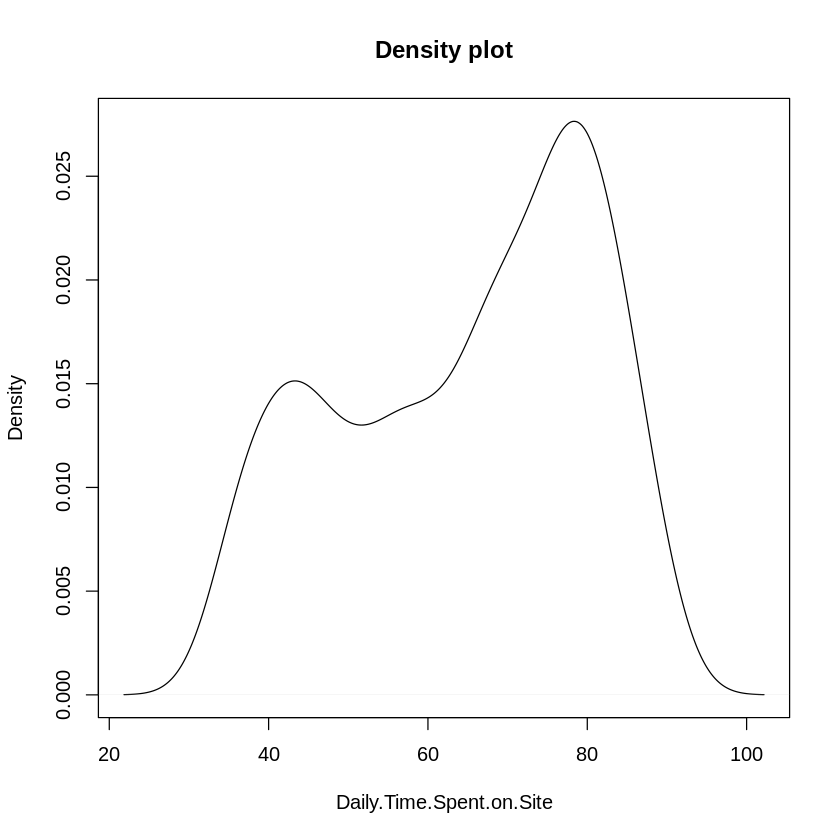

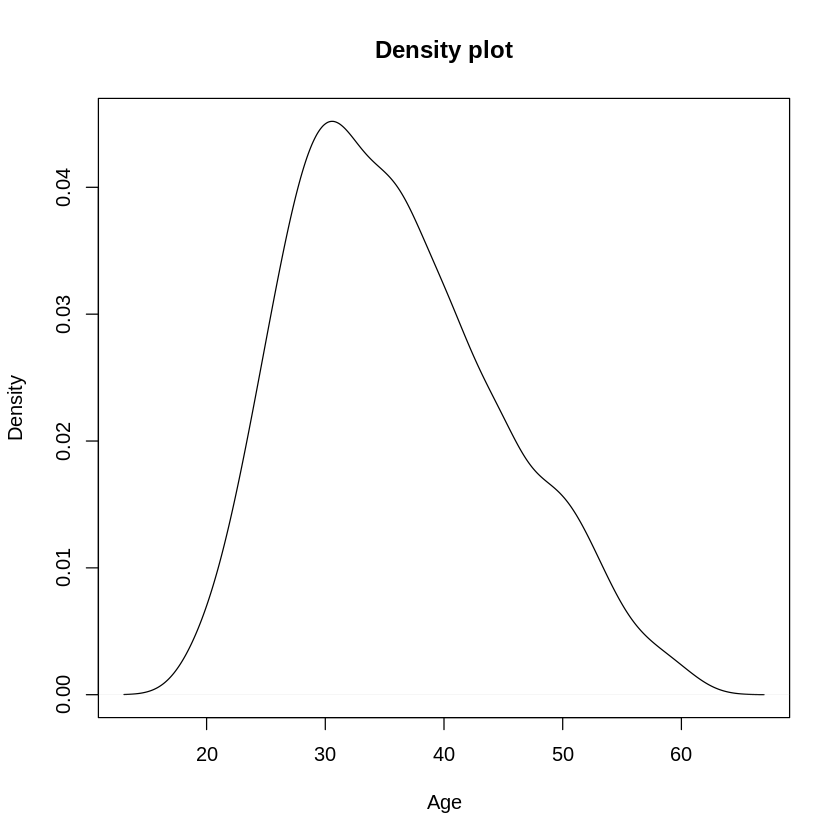

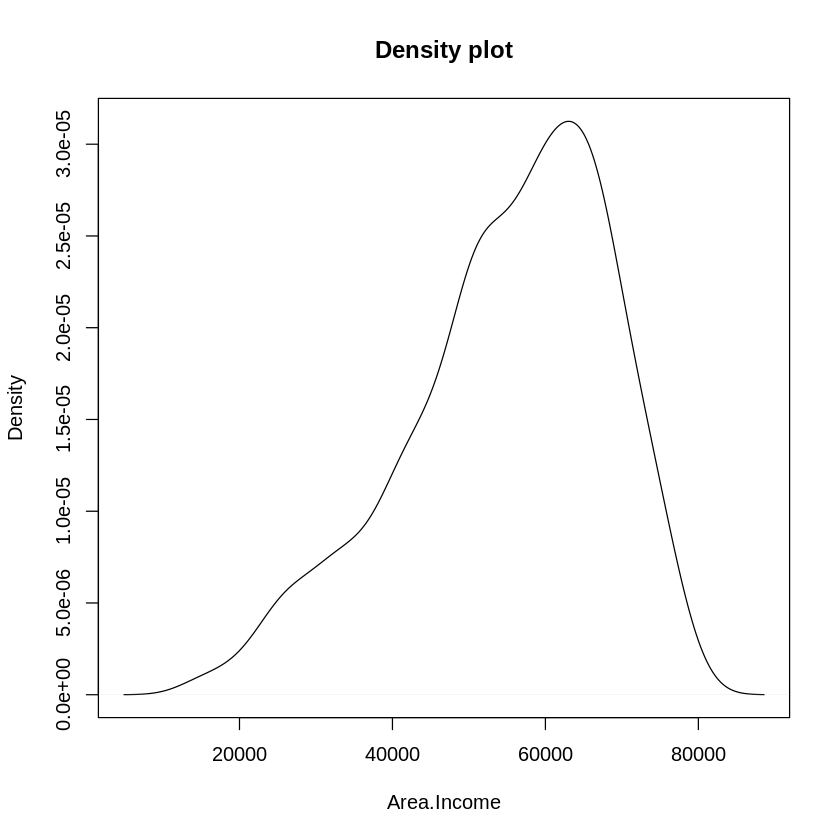

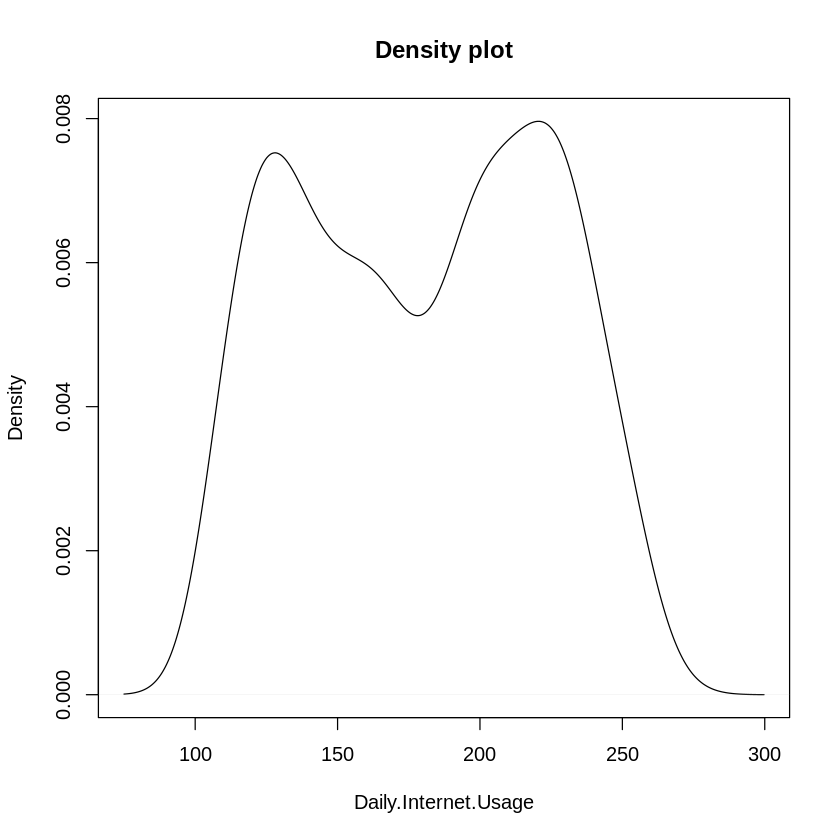

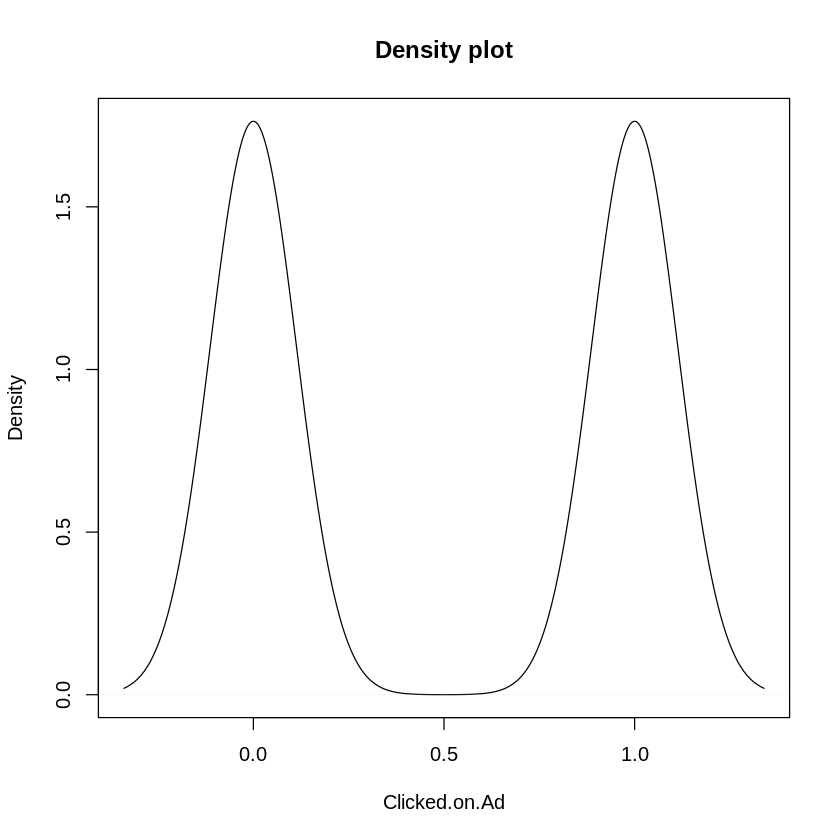

In [ ]:
# plotting density plots for the numerical columns

for (i in names(num_col)){
  x <- num_col[,i]
  plt <- density(x)
  plot(plt, xlab= i, main = "Density plot")
}

### Bar Plots


  0   1 
519 481 

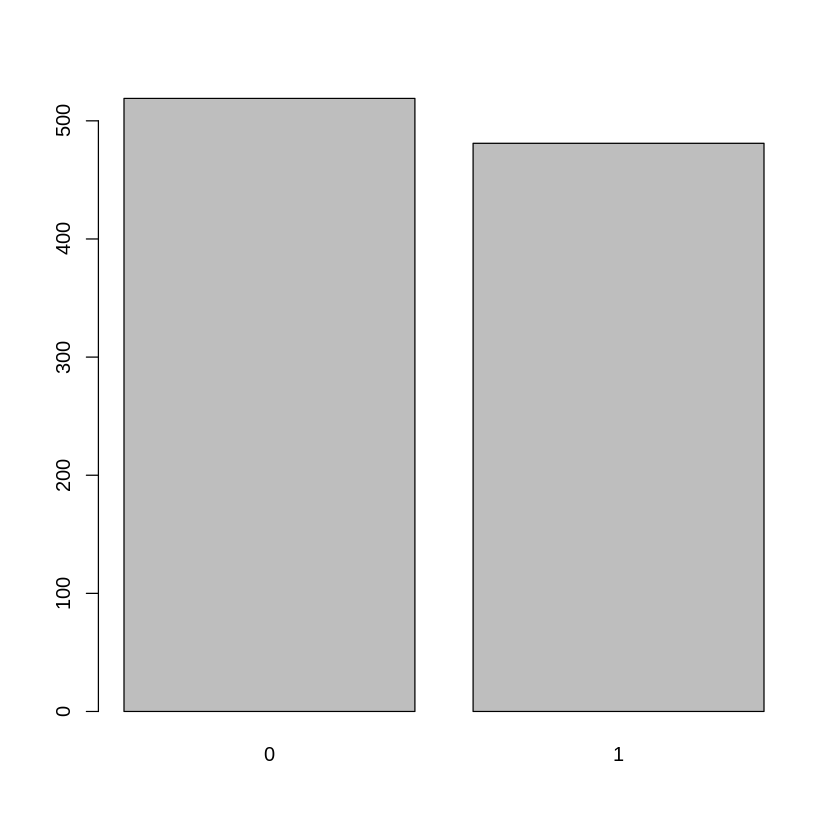

In [16]:
# plotting the barplot for male column

male <- table(df$Male)
male
barplot(male)


  0   1 
500 500 

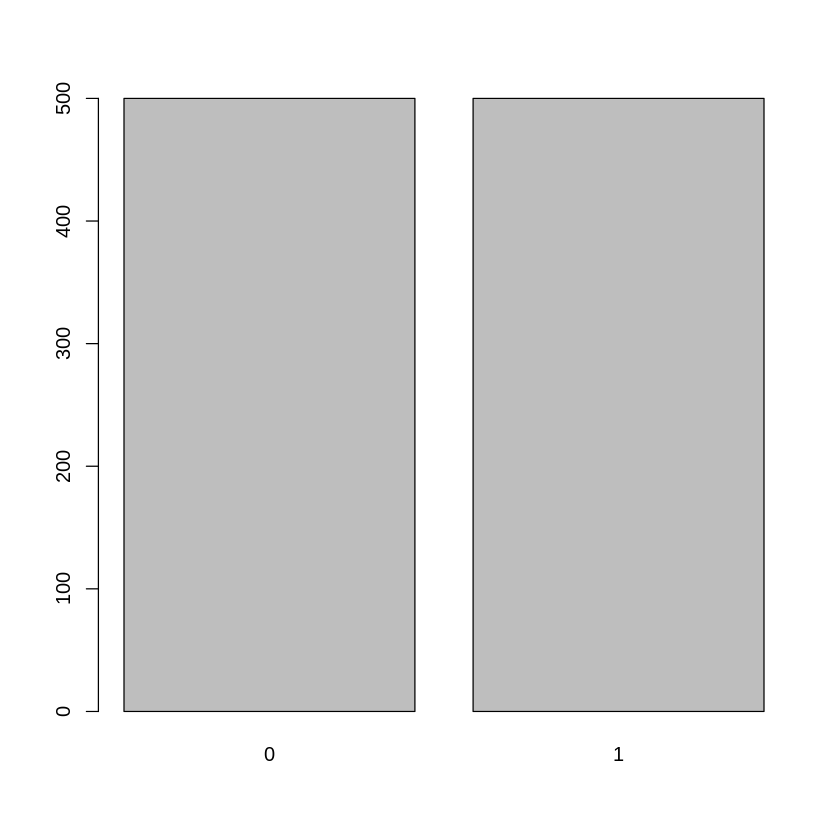

In [15]:
# plotting a barplot for the clicked on ad column
ad <- table(df$Clicked.on.Ad)
ad
barplot(ad)

## **Bivariate Analysis**

In [30]:
# finding the correlation between the numeric variables and round them to 2 decimal places

res <- cor(num_col)
corr <- round(res,2)
corr

,Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Clicked.on.Ad
Daily.Time.Spent.on.Site,1.00,-0.33,0.31,0.52,-0.75
Age,-0.33,1.00,-0.18,-0.37,0.49
Area.Income,0.31,-0.18,1.00,0.34,-0.48
Daily.Internet.Usage,0.52,-0.37,0.34,1.00,-0.79
Clicked.on.Ad,-0.75,0.49,-0.48,-0.79,1.00


### Scatter plots

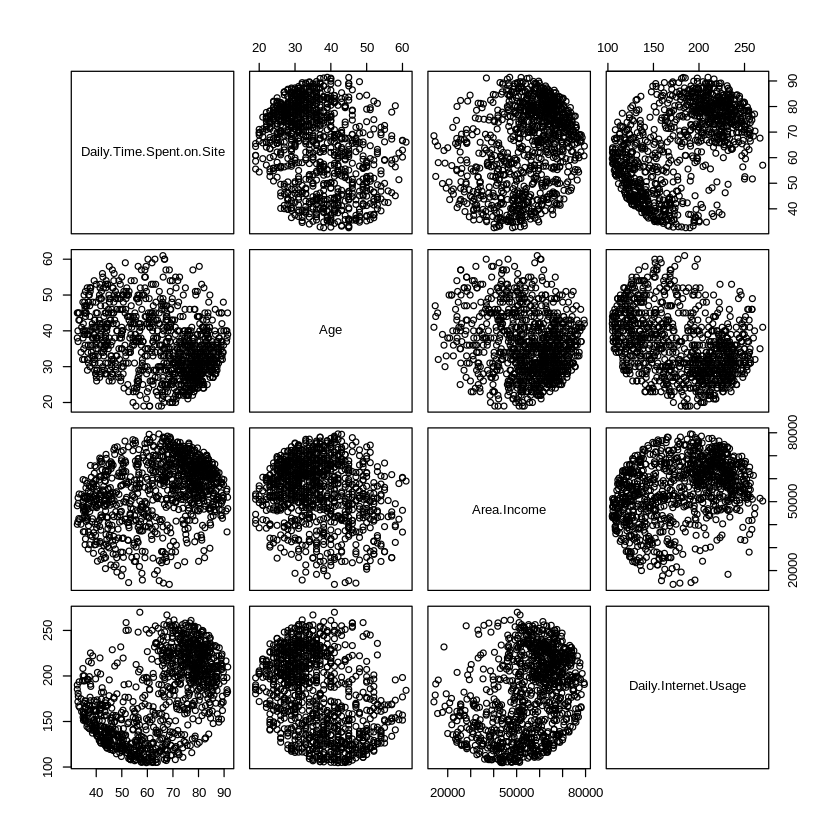

In [ ]:
# finding the scatter plots for the numeric columns

col <- num_col[,c(1,2,3,4)]
pairs(col)

The variables do not show any kind of relationship since the scatter plots do not follow any discernable pattern.

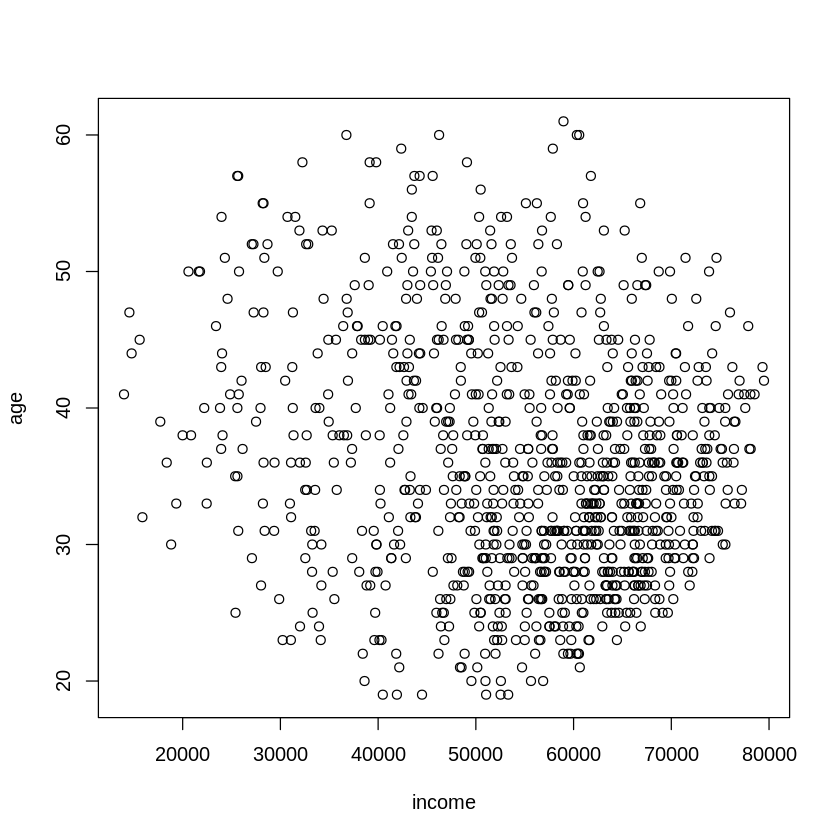

In [18]:
# the scatter plot of age and income

age <- df$Age
income <- df$Area.Income

plot(income, age)

## **Conclusions**

*   The daily time spent online for the people who visited the site ranged from a minimum of 32.6 minutes to a maximum of 91.43 minutes. The average time spent online was 65 minutes with 50% of the visitors spending 68.2 minutes and below. However, most people spent 62.26 minutes online. The standard deviation is 15.85 minutes.

*   People visiting the website were aged between 19 and 61 years. They had an average of 36 years with most visitors having age 31 years. 50% of all visitors had an age of 35 years and below.

*   The minimum income of the visitors was 13,996.50 while the maximum income was 79,484.80. The mean income was 55,000 with 50% of the visitors having an income of 57,012.30 and below. Most people however had an income of 61,833.90 with a standard deviation of 13,414.

*   Internet usage ranged from a minimum of 104.78 to 269.96. The average internet usage was 180 and 50% of individuals had a usage of 183.13 and below. most people had a usage of 167.22 with a standard deviation of 43.

*   The number of people who clicked the ad was equal to the number of people who did not click the ad. This shows that the dataset was balanced.

*   Males were more likely not to click the ad. This is because the number of males that didn't click the ad was more that that who did.

*   The daily time spent on site and clicked on ad had a high negative correlation. This therefore means that the more time a visitor spent online, the less likely the visitor will click on an ad.

*   Daily time spent online and the daily internet usage had a high positive correlation. The more time the visitor spent online, the more internet they used up.

*   Income and internet usage had a weak positive correlation. 


## **Recomendations**

1. The client should target visitors who spent 63 minutes. This is because they are most likely to click on the ad. Visitors who spent more than this time were most likely to experience ad fatigue and therefore less likely to click on an ad.

2. The client should target mid-aged visitors between ages of 30 and 45. They were more likely to click on the ad since they have high disposable income.

3. The client should target visitors with a higher income than his current visitors. This is because the average income of individuals was less than the income of 50% of the individuals visiting the site. Therefore to increase the sales, in adition of tarteting a lot of individuals with low income, he should also target high net worth individuals.